In [1]:
#Imports
import os
os.environ["OMP_NUM_THREADS"] = '1'
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt

In [2]:
loaded_joblib=joblib.load('linreg.joblib')
loaded_joblib.keys()

dict_keys(['preprocessor', 'X_train', 'y_train', 'X_test', 'y_test', 'LinearRegression'])

In [3]:
loaded_joblib2=joblib.load('rfreg.joblib')
loaded_joblib2.keys()

dict_keys(['preprocessor', 'X_train', 'y_train', 'X_test', 'y_test', 'RandomForest'])

In [4]:
X_train=loaded_joblib2['X_train']
X_test=loaded_joblib2['X_test']
y_train=loaded_joblib2['y_train']
y_test=loaded_joblib2['y_test']
preprocessor=loaded_joblib2['preprocessor']
loaded_model=loaded_joblib2['RandomForest']

In [5]:
len(X_train)

6392

In [6]:
X_shap=shap.sample(X_train,random_state=42,nsamples=3000)
X_shap.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Large,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
2937,8.365,0.039811,191.3188,1987.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6371,9.695,0.030414,221.3114,2009.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
y_shap=y_train.loc[X_shap.index]
y_shap

2937    2285.0256
6371    2217.1140
3762     196.4110
419     2940.1728
8475     378.1744
          ...    
3097    3427.5384
6466     689.7688
7220    3946.8624
5591     317.5866
3880     182.4292
Name: Item_Outlet_Sales, Length: 3000, dtype: float64

In [8]:
explainer=shap.Explainer(loaded_model)
explainer

In [9]:
shap_values=explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [10]:
X_shap.shape

(3000, 37)

In [11]:
shap_values.shape

(3000, 37)

In [12]:
shap_values[0]

.values =
array([ 2.43800610e+01, -8.27847308e+00,  5.60185055e+02, -2.64456121e+02,
        2.08325770e+01, -2.82266931e+00, -3.57455145e+00, -1.82182909e+00,
       -4.28838705e+00, -1.76877209e+00, -5.09790239e+00,  5.88345808e+01,
       -2.89873131e+00, -3.14531645e-01, -5.41913262e+00,  3.19701654e-01,
       -9.39899956e-01, -1.83071668e-01, -2.89161006e+00, -1.88184864e+00,
        1.80944926e+00,  2.00746799e+00, -1.10791194e+02,  1.71435288e+00,
       -1.46299185e+02, -1.74404042e+00,  3.88069814e+00, -2.87245242e+00,
       -2.73275640e+00, -1.86744863e+01, -1.46716871e+02, -3.45470347e+00,
        3.05871533e-01, -2.79827059e+00, -1.00582533e+03,  1.45923425e+02,
       -1.08545550e+02])

.base_values =
array([2209.0866321])

.data =
array([8.3650000e+00, 3.9811272e-02, 1.9131880e+02, 1.9870000e+03,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.000

In [13]:
pd.DataFrame(shap_values.values, columns = X_shap.columns)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Large,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
0,24.380061,-8.278473,560.185055,-264.456121,20.832577,-2.822669,-3.574551,-1.821829,-4.288387,-1.768772,...,-2.872452,-2.732756,-18.674486,-146.716871,-3.454703,0.305872,-2.798271,-1005.825325,145.923425,-108.545550
1,15.786594,-30.876293,878.309156,234.046783,27.491108,-3.718162,-3.412394,-4.741664,-3.195417,-7.327627,...,5.799445,-3.518032,4.283536,140.097418,2.168181,0.029841,3.215495,-1222.695468,-96.331199,-105.908644
2,3.529157,100.409387,-1731.010328,-27.516091,-3.423336,-0.990694,-0.566483,-0.474816,0.815546,0.924920,...,0.748155,-1.466693,5.115868,-17.347474,1.184260,3.509296,5.740313,240.524907,-15.956726,-48.310621
3,17.082076,49.543209,-117.715513,187.854340,8.227737,-2.305761,-0.120058,1.054560,0.065409,1.660453,...,2.070875,-1.522096,7.166429,-76.294180,1.463189,-1.748382,-0.232720,-737.698658,115.770166,-96.100930
4,-9.649341,-7.531286,-545.321852,-143.431683,-3.368672,-1.078544,0.356710,-1.965881,1.137750,-1.203554,...,2.827500,4.687680,7.206710,74.703449,0.896416,0.495662,0.043005,-657.831933,106.601900,-108.363228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,103.235870,92.834446,368.005250,-220.402188,4.014909,-2.297511,-0.995527,-1.130197,1.687835,3.430713,...,3.167025,7.831078,14.462290,168.834696,-0.308164,0.454727,-0.723402,-844.042798,135.551132,-105.717531
2996,-29.500631,10.093148,-535.438080,-161.039315,-2.836667,-2.401524,-0.425902,-3.576118,-0.310412,-1.741580,...,-0.211281,-0.463806,-14.679612,-71.218862,-1.804436,-0.837433,-0.772030,-711.017236,100.654610,-124.177037
2997,6.668101,-51.531634,343.581528,-75.769471,49.617327,-6.449374,-2.599942,-12.814395,4.399143,4.289381,...,0.292178,-0.867650,2.904792,50.113993,-1.371338,1.057768,-1.372356,-464.842617,-40.907958,902.534622
2998,-14.500427,-47.832355,-1442.987039,92.092720,-3.606708,-0.147401,-1.083011,-0.391281,-0.061376,-0.363418,...,0.504490,-0.989450,5.524891,-50.241370,-1.168311,-0.511052,-0.549126,-420.703587,61.388225,-62.033232


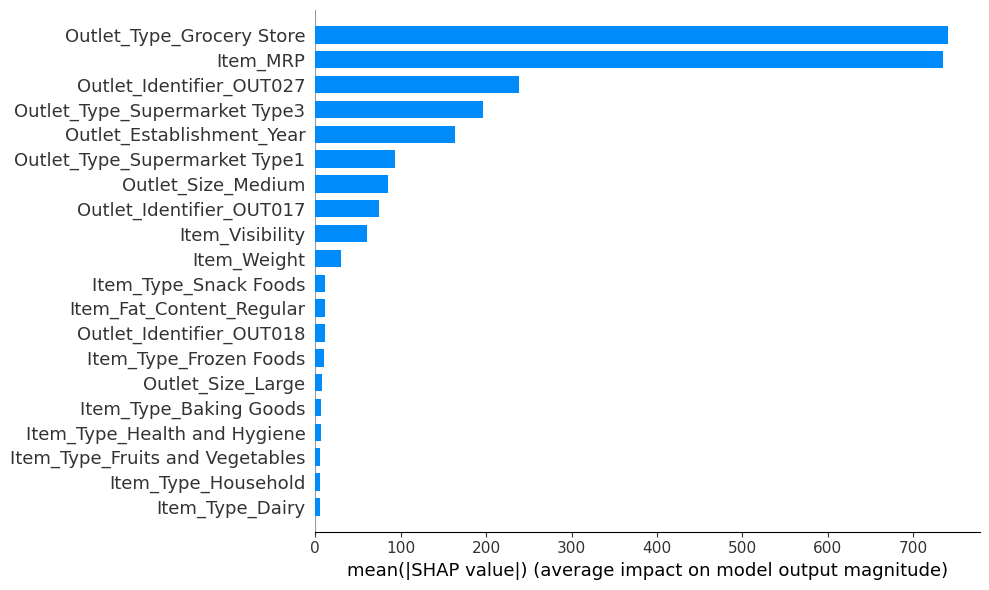

In [18]:
shap.summary_plot(shap_values, features=X_shap, plot_type='bar', show=False, plot_size=(10, 6))
plt.gcf().savefig('shap.png')

# Comparing to Importance with SHAP

   * Item_MRP: Both Shap and our Random Forest model this is a very important feature in our predictions.
   * Item_Visibility: This shows on both, but seems to have a very low impact according to SHAP.
   * Outlet_Type: Is shown as important in both scorings.

![importance](importances.png)

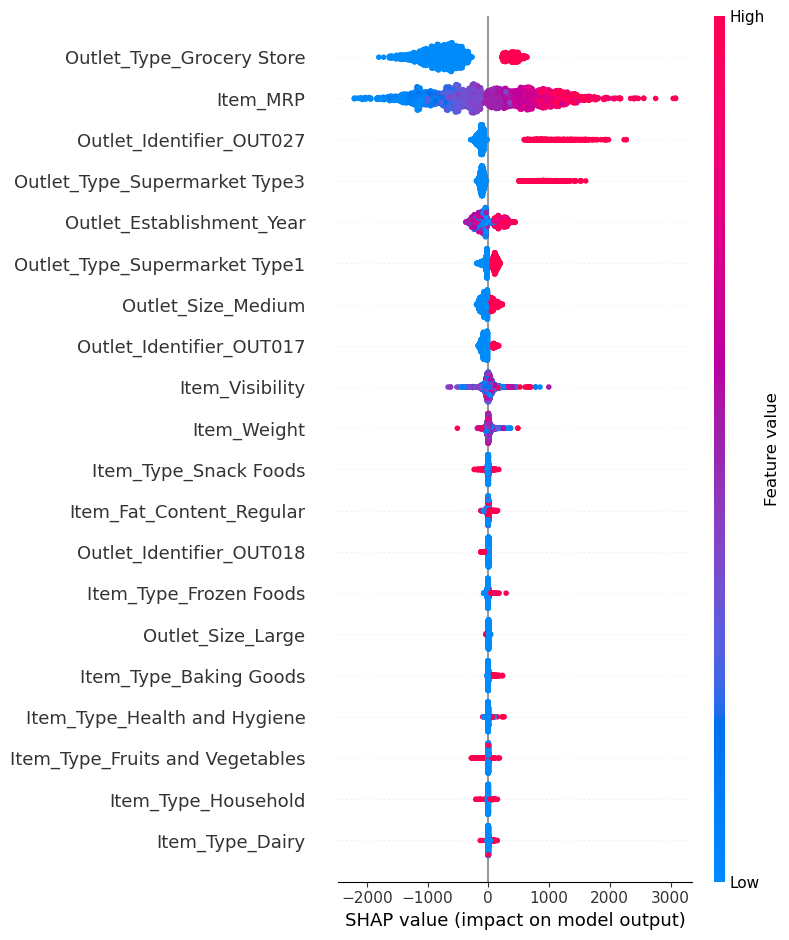

<Figure size 640x480 with 0 Axes>

In [19]:
shap.summary_plot(shap_values,features= X_shap, plot_type='dot')
plt.gcf().savefig('shapdot.png')

# Evalute 'dot' plot

* Outlet_Type_Grocery store: Grocery store type has the best sales.
* Item_MRP: Effects the model in both ways. 
* Outlet_Identifier_OUT027: Highest selling store.